LOSS

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.patches import ConnectionPatch
import matplotlib as mpl

# import matplotlib.pyplot as plt

from matplotlib.transforms import Bbox, TransformedBbox, blended_transform_factory
from mpl_toolkits.axes_grid1.inset_locator import (
    BboxConnector,
    BboxConnectorPatch,
    BboxPatch,
)
plt.rcParams.update(
    {
        "text.usetex": True,
        "text.latex.preamble": r"\usepackage{amsmath}\usepackage{amssymb}",
        "font.family": "serif",
        "font.serif": "Computer Modern Roman",
        # "pgf.texsystem": 'pdflatex'
    }
)


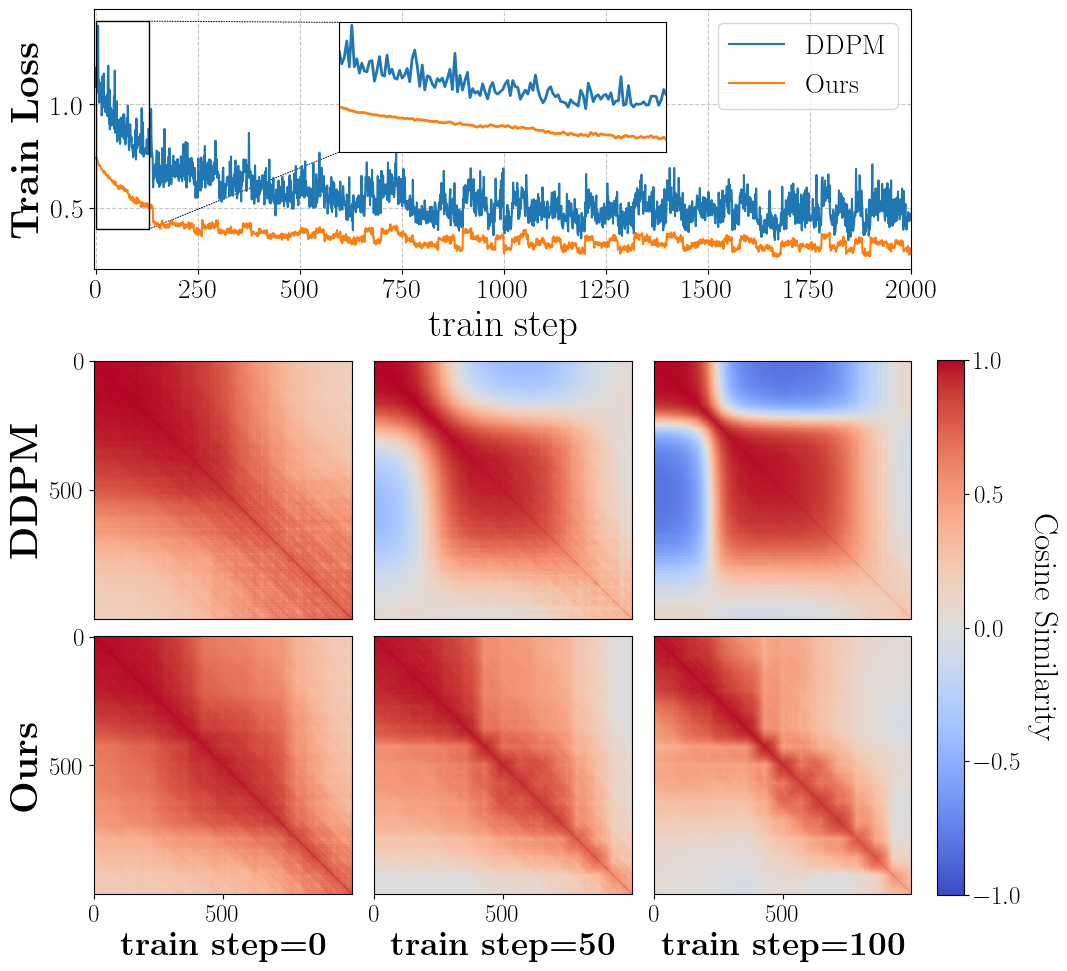

In [11]:
ddpm_ts_loss = np.load("../intro_analysis_electricity_ddpm_1000_full/loss.npy")
mad_ts_loss = np.load("../intro_analysis_electricity_mad_full/loss.npy")
elec_cs = np.load("../intro_analysis_electricity_ddpm_1000_full/cos_sim.npy")[[0, 5, 10]]
elec_mad_cs = np.load("../intro_analysis_electricity_mad_full/cos_sim.npy")[[0, 5, 10]]
all_cos_sim = [elec_cs, elec_mad_cs]


def connect_bbox(
    bbox1, bbox2, loc1a, loc2a, loc1b, loc2b, prop_lines, prop_patches=None
):
    if prop_patches is None:
        prop_patches = {
            **prop_lines,
            "alpha": prop_lines.get("alpha", 1) * 0.2,
            "clip_on": False,
        }

    c1 = BboxConnector(
        bbox1, bbox2, loc1=loc1a, loc2=loc2a, clip_on=False, **prop_lines
    )
    c2 = BboxConnector(
        bbox1, bbox2, loc1=loc1b, loc2=loc2b, clip_on=False, **prop_lines
    )

    bbox_patch1 = BboxPatch(bbox1, **prop_patches)
    bbox_patch2 = BboxPatch(bbox2, **prop_patches)

    p = BboxConnectorPatch(
        bbox1,
        bbox2,
        loc1a=loc1a,
        loc2a=loc2a,
        loc1b=loc1b,
        loc2b=loc2b,
        clip_on=False,
        **prop_patches,
    )

    return c1, c2, bbox_patch1, bbox_patch2, p


def zoom_effect01(ax1, ax2, xmin, xmax, **kwargs):
    """
    Connect *ax1* and *ax2*. The *xmin*-to-*xmax* range in both Axes will
    be marked.

    Parameters
    ----------
    ax1
        The main Axes.
    ax2
        The zoomed Axes.
    xmin, xmax
        The limits of the colored area in both plot Axes.
    **kwargs
        Arguments passed to the patch constructor.
    """

    bbox = Bbox.from_extents(xmin, 0, xmax, 1)

    mybbox1 = TransformedBbox(bbox, ax1.get_xaxis_transform())
    mybbox2 = TransformedBbox(bbox, ax2.get_xaxis_transform())

    prop_patches = {**kwargs, "ec": "none", "alpha": 0.2}

    c1, c2, bbox_patch1, bbox_patch2, p = connect_bbox(
        mybbox1,
        mybbox2,
        loc1a=3,
        loc2a=2,
        loc1b=4,
        loc2b=1,
        prop_lines=kwargs,
        prop_patches=prop_patches,
    )

    ax1.add_patch(bbox_patch1)
    ax2.add_patch(bbox_patch2)
    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)

    return c1, c2, bbox_patch1, bbox_patch2, p


def zoom_effect02(ax1, ax2, **kwargs):
    """
    ax1 : the main Axes
    ax1 : the zoomed Axes

    Similar to zoom_effect01.  The xmin & xmax will be taken from the
    ax1.viewLim.
    """

    tt = ax1.transScale + (ax1.transLimits + ax2.transAxes)
    trans = blended_transform_factory(ax2.transData, tt)

    mybbox1 = ax1.bbox
    mybbox2 = TransformedBbox(ax1.viewLim, trans)

    prop_patches = {**kwargs, "ec": "none", "alpha": 0.1}

    c1, c2, bbox_patch1, bbox_patch2, p = connect_bbox(
        mybbox1,
        mybbox2,
        loc1a=3,
        loc2a=2,
        loc1b=4,
        loc2b=1,
        prop_lines={"color": "gray", "alpha": 0.8, "linestyle": "dashed"},
        prop_patches=prop_patches,
    )

    ax1.add_patch(bbox_patch1)
    ax2.add_patch(bbox_patch2)
    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)

    return c1, c2, bbox_patch1, bbox_patch2, p

# fig = plt.figure(figsize=(3*1.5, 4*1.5), layout='constrained')
# fig = plt.figure(figsize=(8.5*1.2, 8*1.2),  layout='constrained')
fig = plt.figure(figsize=(8.8*1.2, 8*1.2),  layout='constrained')
axs = fig.subplot_mosaic(
    [
        # [
        #     "main",
        #     "main",
        #     "main",
        # ],
        # [
        #     "main",
        #     "main",
        #     "main",
        # ],
        # [
        #     "main",
        #     "main",
        #     "main",
        # ],
        [
            "main",
            "main",
            "main",
        ],
        # ["00", "01", "02"],
        # ["00", "01", "02"],
        ["00", "01", "02"],
        # ["10", "11", "12"],
        # ["10", "11", "12"],
        ["10", "11", "12"],
    ],
)
# axs = plt.figure(figsize=(15, 6)).subplot_mosaic(
#     [
#         ["main", "main", "main", "00", "01", "02"],
#         ["main", "main", "main", "10", "11", "12"],
#     ],
# )

ylabels = ["\\textbf{DDPM}", "\\textbf{Ours}"]
xlabels = ["\\textbf{train step=0}", "\\textbf{train step=50}", "\\textbf{train step=100}"]

axs["main"].plot(ddpm_ts_loss, label='DDPM')
axs["main"].plot(mad_ts_loss, label='Ours')
axs["main"].set_xlabel(r'{train step}', fontsize=28)
axs["main"].set_ylabel(r'\textbf{Train Loss}', fontsize=28)
# axs["main"].set_xlabel(r'\textbf{iter.}', fontsize=20)
axs["main"].grid(alpha=0.75, linestyle="dashed")
axs["main"].set_axisbelow(True)


# inset Axes....
x1, x2, y1, y2 = 0, 130, 0.4, 1.4  # subregion of the original image
axins = axs["main"].inset_axes(
    [0.3, 0.45, 0.4, 0.5],
    xlim=(x1, x2),
    ylim=(y1, y2),
    xticklabels=[],
    yticklabels=[],
    xticks=[],
    yticks=[],
)
axins.plot(ddpm_ts_loss, lw=2)
axins.plot(mad_ts_loss, lw=2)

# axs["main"].indicate_inset_zoom(axins, edgecolor="black")

rect = (x1, y1, x2 - x1, y2 - y1)

box = axs["main"].indicate_inset(rect, edgecolor="black", alpha=1, lw=1)

cp1 = ConnectionPatch(
    xyA=(x2, y1),
    xyB=(0, 0),
    axesA=axs["main"],
    axesB=axins,
    coordsA="data",
    coordsB="axes fraction",
    lw=0.7,
    ls=":",
)
cp2 = ConnectionPatch(
    xyA=(x2, y2),
    xyB=(0, 1),
    axesA=axs["main"],
    axesB=axins,
    coordsA="data",
    coordsB="axes fraction",
    lw=0.7,
    ls=":",
)

axs["main"].add_patch(cp1)
axs["main"].add_patch(cp2)
axs["main"].set_xlim(-5,2000)
axs["main"].tick_params(labelsize=20)
axs["main"].legend(fontsize=20)


# axs["zoom1"].set(xlim=(0, 140))
# axs["zoom1"].set(ylim=(0.4, 1.4))
# axs["zoom1"].set_xticklabels([])
# axs["zoom1"].axes.get_xaxis().set_visible(False)

# axs["zoom1"].plot(ddpm_ts_loss)
# axs["zoom1"].plot(mad_ts_loss)
# axs["zoom1"].set_yscale('log')
# zoom_effect02(axs["zoom1"], axs["main"], linestyle='--')
# zoom_effect02(axs["zoom2"], axs["main"])

for ax_name in range(len(all_cos_sim)):
    for ax_idx in range(len(elec_cs)):
        im = axs[f"{ax_name}{ax_idx}"].imshow(
            all_cos_sim[ax_name][ax_idx], cmap="coolwarm", vmin=-1, vmax=1
        )
        axs[f"{ax_name}{ax_idx}"].xaxis.set_major_locator(plt.MaxNLocator(2))
        axs[f"{ax_name}{ax_idx}"].yaxis.set_major_locator(plt.MaxNLocator(2))
        axs[f"{ax_name}{ax_idx}"].tick_params(labelsize=18)
        if ax_idx == 0:
            axs[f"{ax_name}{ax_idx}"].set_ylabel(ylabels[ax_name], fontsize=28)
        if ax_name == 1:
            axs[f"{ax_name}{ax_idx}"].set_xlabel(xlabels[ax_idx], fontsize=24)
        if ax_name == 0:
            axs[f"{ax_name}{ax_idx}"].axes.get_xaxis().set_visible(False)
        if ax_idx != 0:
            axs[f"{ax_name}{ax_idx}"].axes.get_yaxis().set_visible(False)
# cax,kw = mpl.colorbar.make_axes([ax for ax in [axs['02'],axs['12']]])
cbar = fig.colorbar(im, ax=[axs['12'],axs['02']], ticks=[-1, -0.5, 0, 0.5, 1], pad=0.001)
cbar.ax.set_ylabel('Cosine Similarity',  fontsize=24, va='bottom', rotation=270)
# cbar.ax.set_xlabel('Cosine Similarity',  fontsize=24)
# cbar = fig.colorbar(im, ax=[axs['11'],axs['10'],axs['12']],orientation="horizontal", ticks=[-1, -0.5, 0, 0.5, 1])
cbar.ax.tick_params(labelsize=18)
fig.savefig('../assets/intro_1_new.pdf', bbox_inches='tight')
# fig.colorbar(im, ax=[axs['02'],axs['12']])
# fig.get_layout_engine().set(w_pad=4 / 72, h_pad=4 / 72, hspace=0,
#                             wspace=0)
# fig.colorbar(im, ax=[axs['02'],axs['01'],axs['00'],axs['12'],axs['11'],axs['10']])
# fig.subplots_adjust(wspace=0.1, hspace=0.1)
# plt.show()
# fig.colorbar(im,use_gridspec=True)
# fig.subplots_adjust(hspace=0.01)
# fig.tight_layout()
# plt.savefig('../assets/intro_loss.pdf', bbox_inches='tight')
# fig, ax =plt.subplots()
# # ddpm_ts_loss = np.mean(ddpm_ts_loss.reshape(-1, 20), axis=1)
# # mad_ts_loss = np.mean(mad_ts_loss.reshape(-1, 20), axis=1)
# plt.plot(ddpm_ts_loss)
# plt.plot(mad_ts_loss)
# # plt.xscale('log')
# # plt.yscale('log')

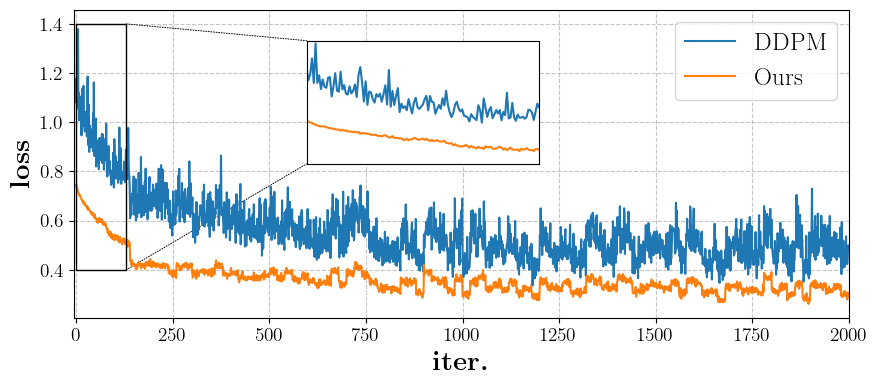

In [243]:
ddpm_ts_loss = np.load("../intro_analysis_electricity_ddpm_1000_full/loss.npy")
mad_ts_loss = np.load("../intro_analysis_electricity_mad_full/loss.npy")
elec_cs = np.load("../intro_analysis_electricity_ddpm_1000_full/cos_sim.npy")[[0, 4, 9]]
elec_mad_cs = np.load("../intro_analysis_electricity_mad_full/cos_sim.npy")[[0, 4, 9]]
all_cos_sim = [elec_cs, elec_mad_cs]

fig, ax = plt.subplots(figsize=(10,4))

ax.plot(ddpm_ts_loss, label='DDPM')
ax.plot(mad_ts_loss, label='Ours')
ax.grid(alpha=0.75, linestyle="dashed")
ax.set_axisbelow(True)


# inset Axes....
x1, x2, y1, y2 = 0, 130, 0.4, 1.4  # subregion of the original image
axins = ax.inset_axes(
    [0.3, 0.5, 0.3, 0.4],
    xlim=(x1, x2),
    ylim=(y1, y2),
    xticklabels=[],
    yticklabels=[],
    xticks=[],
    yticks=[],
)
axins.plot(ddpm_ts_loss)
axins.plot(mad_ts_loss)

# ax.indicate_inset_zoom(axins, edgecolor="black")

rect = (x1, y1, x2 - x1, y2 - y1)

box = ax.indicate_inset(rect, edgecolor="black", alpha=1, lw=1)

cp1 = ConnectionPatch(
    xyA=(x2, y1),
    xyB=(0, 0),
    axesA=ax,
    axesB=axins,
    coordsA="data",
    coordsB="axes fraction",
    lw=0.7,
    ls=":",
)
cp2 = ConnectionPatch(
    xyA=(x2, y2),
    xyB=(0, 1),
    axesA=ax,
    axesB=axins,
    coordsA="data",
    coordsB="axes fraction",
    lw=0.7,
    ls=":",
)

ax.add_patch(cp1)
ax.add_patch(cp2)
ax.set_xlim(-5,2000)
ax.legend(fontsize=18)
ax.tick_params(labelsize=14)
ax.set_xlabel(r'\textbf{iter.}', fontsize=20)
ax.set_ylabel(r'\textbf{loss}', fontsize=20)
fig.savefig('../assets/intro_loss.pdf', bbox_inches='tight')


/tmp/ipykernel_831201/83692382.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


19.5
5.0


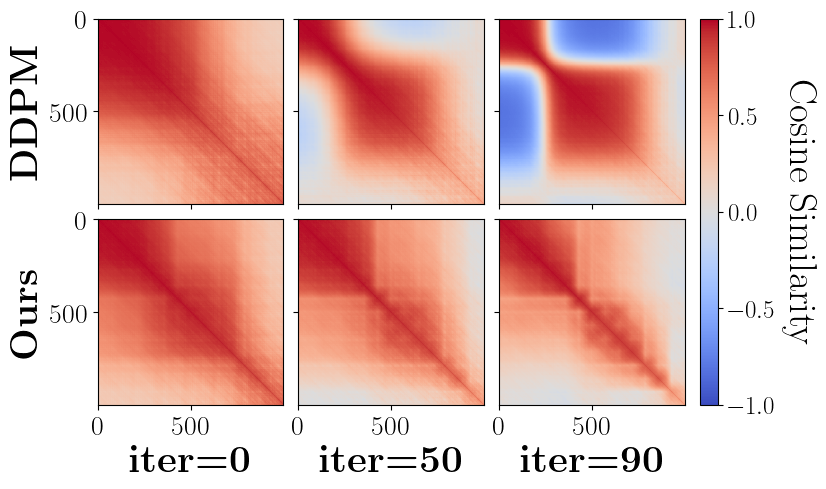

In [233]:
# image_cs = np.load("../intro_analysis_fashionminist/cos_sim.npy")[[0, 5, 10]]
elec_cs = np.load("../intro_analysis_electricity_ddpm_1000_full/cos_sim.npy")[[0, 4, 9]]
elec_mad_cs = np.load("../intro_analysis_electricity_mad_full/cos_sim.npy")[[0, 4, 9]]
all_cos_sim = [elec_cs, elec_mad_cs]
# all_cos_sim = [image_cs, elec_cs, elec_mad_cs]
fig = plt.figure(figsize=(9.75 * 2 , 5))
ylabels = [u'\\textbf{DDPM}',u'\\textbf{Ours}']
xlabels = [u'\\textbf{iter=0}',u'\\textbf{iter=50}',u'\\textbf{iter=90}']
# ylabels = [u'\\textbf{Fashion MNIST} \n \\textit{DDPM}',u'\\textbf{Electricity} \n \\textit{DDPM}',u'\\textbf{Electricity} \n \\textit{Ours}']
# xlabels = [u'\\textbf{iter=0}',u'\\textbf{iter=50}',u'\\textbf{iter=100}']
grid = ImageGrid(
    fig,
    111,
    nrows_ncols=(len(all_cos_sim), len(elec_cs)),
    axes_pad=0.15,
    share_all=True,
    cbar_location="right",
    cbar_mode="single",
    # cbar_size="7%",
    # cbar_pad=0.15,
)

for i in range(len(all_cos_sim)):
    plt_sim = all_cos_sim[i]
    for j in range(len(elec_cs)):
        im = grid[len(elec_cs) * i + j].imshow(
            plt_sim[j], cmap="coolwarm", vmin=-1, vmax=1
        )
        if j == 0:
            grid[len(elec_cs) * i + j].set_ylabel(ylabels[i],fontsize=28)
        
        grid[len(elec_cs) * i + j].xaxis.set_major_locator(plt.MaxNLocator(2))
        grid[len(elec_cs) * i + j].yaxis.set_major_locator(plt.MaxNLocator(2))
        grid[len(elec_cs) * i + j].tick_params(labelsize=20)
        if i == 1:
            grid[len(elec_cs) * i + j].set_xlabel(xlabels[j],fontsize=28)
        # grid[len(elec_cs) * i + j].set_xticklabels([0, 1000])
        # grid[len(elec_cs) * i + j].set_yticklabels([])
        

cbar = grid[len(elec_cs) * i + j].cax.colorbar(im, ax=grid, ticks=[-1, -0.5, 0, 0.5, 1])
cbar.ax.set_ylabel('Cosine Similarity', rotation=-90, va="bottom", fontsize=28)
cbar.ax.tick_params(labelsize=18)
fig.tight_layout()
print(fig.get_figwidth())
print(fig.get_figheight())
# fig.get_figheight()
fig.savefig('../assets/intro_1.pdf', bbox_inches='tight')

[6.5732603]
[4.486404]
[4.202306]


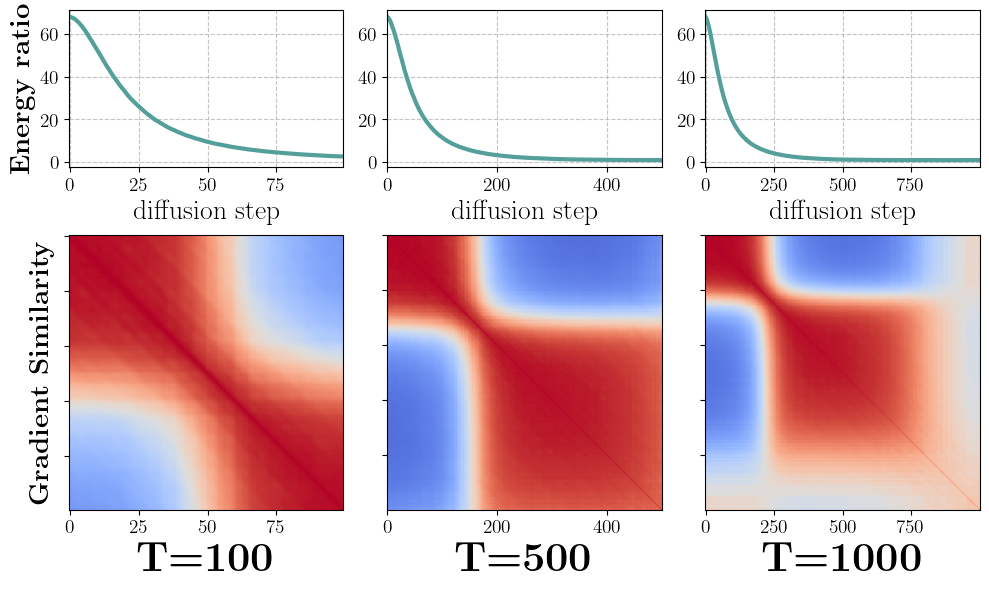

In [45]:
import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec

steps = [100, 500, 1000]

# gridspec inside gridspec
fig = plt.figure(figsize=[10, 6])

gs0 = gridspec.GridSpec(1, len(steps), figure=fig)
# ylabels = [r'\textbf{T=100}',r'\textbf{T=300}',r'\textbf{T=500}',r'\textbf{T=700}',r'\textbf{T=900}']
ylabels = [r'\textbf{T=100}',r'\textbf{T=500}',r'\textbf{T=1000}']
ax1s = []
for i in range(len(steps)):
    lh = np.load(f'../intro_analysis_electricity_ddpm_{steps[i]}_full/{steps[i]}-lhratio_0.2.npy')
    grads = np.load(f'../intro_analysis_electricity_ddpm_{steps[i]}_full/cos_sim.npy')[10]
    turn = grads[0] - 0
    turn = np.argmin(np.abs(turn))
    print(lh[turn])
    # print(np.argmin(np.abs(turn)))
    # axs[0, i].plot(lh)
    # axs[1, i].imshow(grads)
    
    gs00 = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs0[i])

    ax2 = fig.add_subplot(gs00[1:, :])
    ax1 = fig.add_subplot(gs00[:1, :], sharey=ax1s[i-1] if i >0 else None)
    ax1s.append(ax1)
    
    # ax2.set_xticklabels([])
    # if i > 0:
    #     ax1.set_yticklabels([])
    ax2.set_yticklabels([])
    ax1.set_xlabel('diffusion step', fontsize=20)
    # ax1.set_xticklabels([])
    
    # ax2.set_yticklabels([])
    # ax2.spines['top'].set_visible(True)
    # ax2.tick_params(top=True, bottom=False,
    #                labeltop=True, labelbottom=False)
    ax1.plot(lh, lw =3 , c='#549F9A')
    cbar = ax2.imshow(grads, vmin=-1, vmax=1, cmap='coolwarm')
    if i ==0:
        ax1.set_ylabel(r'\textbf{Energy ratio}', fontsize=20)
        ax2.set_ylabel(r'\textbf{Gradient Similarity}', fontsize=20)
    ax1.grid(alpha=0.75, linestyle="dashed")
    ax1.set_axisbelow(True)
    ax1.set_xlim(ax2.get_xlim())
    # ax1.axvline(turn)
    ax1.tick_params(labelsize=14)
    ax2.tick_params(labelsize=14)
    ax2.set_xlabel(ylabels[i], fontsize=30)
# fig.colorbar(cbar)
# plt.subplots_adjust(hspace=0.001)
fig.tight_layout()
fig.savefig('../assets/intro_2_new.pdf', bbox_inches='tight')



(26304, 1)
train 18013


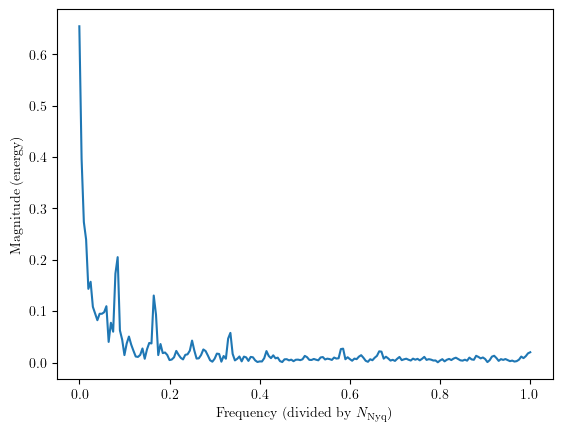

In [75]:
import torch
import yaml
from src.datamodule.data_factory import data_provider

dataset = "electricity"
data_config = yaml.safe_load(open(f"../configs/dataset/{dataset}.yaml", "r"))
data_config["batch_size"] = 64
data_config["seq_len"] = 0
data_config["pred_len"] = 400
_, train_dl = data_provider(data_config, "train")
batch = next(iter(train_dl))
batch_size = batch["x"].shape[0]

all_data = torch.stack(
    [batch["x"] for i, batch in enumerate(train_dl) if i < 20], dim=0
)
all_data_concat = all_data.flatten(end_dim=1)

# data_fft = (torch.fft.rfft(all_data_concat, dim=1)[:,1:].abs()**2)
# data_fft = (torch.fft.rfft(all_data_concat, dim=1)[:,1:].abs()**2).mean(dim=0)
# plt.plot(np.arange(len(data_fft))/len(data_fft), data_fft)
# plt.xlabel(r'Frequency $f_k / f_\text{Nyq}$')
# plt.ylabel(r'Magnitude$^2$')
# sample = 
_ = plt.magnitude_spectrum(all_data_concat[0].flatten())
plt.xlabel(r'Frequency (divided by $N_{\text{Nyq}}$)')
plt.savefig('../assets/ecl_fft.pdf')
# plt.yscale('log')
# model_config = yaml.safe_load(open("configs/model/DDPM_toy.yaml", "r"))
# model_config["bb_config"]["seq_length"] = batch["x"].shape[1]


# model_config = yaml.safe_load(open("configs/model/DDPM_toy.yaml", "r"))
# model_config["bb_config"]["seq_length"] = batch["x"].shape[1]


# n_step = 1000
# epochs = 100
# ddpm_sched = linear_schedule(n_step)
# torch.save(ddpm_sched, f"{save_root}/linear_sched_{n_step}.pt")

# # batch['x'] = (batch['x'] - batch['x'].mean(dim=1, keepdim=True))/batch['x'].std(dim=1, keepdim=True)

# fig, axs = plt.subplots(2)
# ddpm_lh_ratio = []
# split = 0.1

# fft_ts = torch.fft.rfft(all_data_concat[0].flatten(), dim=1)
